In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
#importing the necessary packages  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

import seaborn as sns

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#downloading the iris dataset, splitting it into train set and validation set 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col=['sepal_length','sepal_width','petal_length','petal_width','type']

df = pd.read_csv(url, names = col)

# Print first 5 rows of the dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df2 = df
df2['type']  = df2['type'].replace({'Iris-setosa': 0})
df2['type']  = df2['type'].replace({'Iris-versicolor': 1})
df2['type']  = df2['type'].replace({'Iris-virginica': 2})
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #predictors

y = df2[['type']] #target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/sean/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


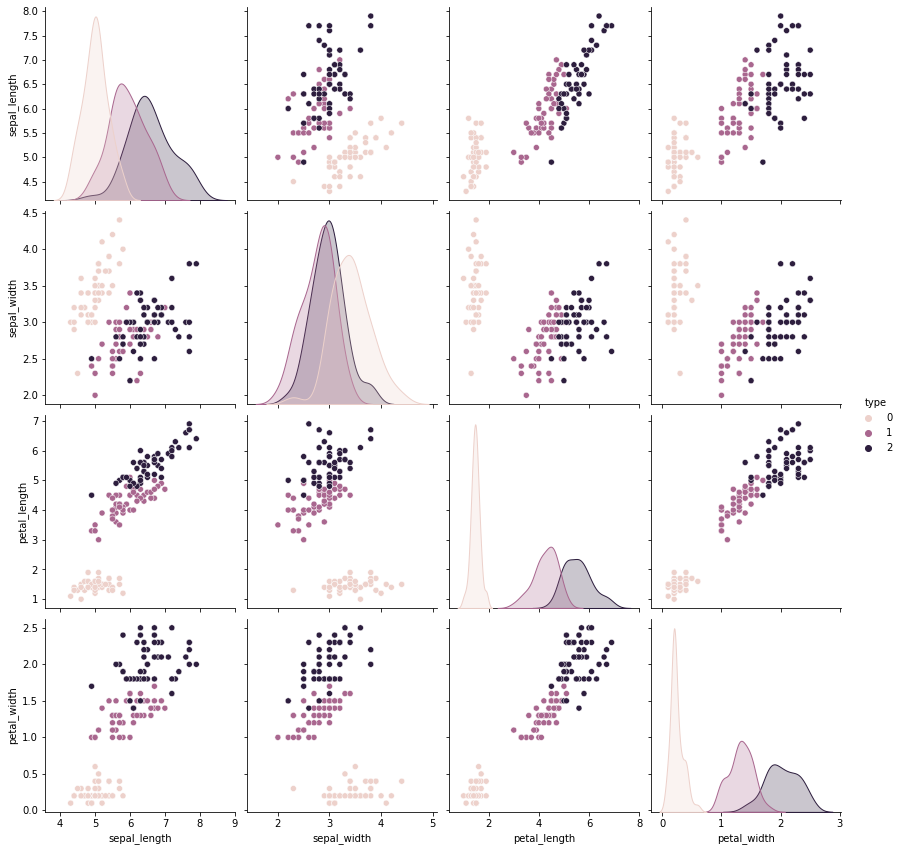

In [8]:
# Bivariate Pairwise relationships between columns with seaborn library
sns.pairplot(df2, hue="type", size=3, diag_kind="kde")

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)

In [10]:
y_predict = mlp.predict(X_test)  
print("Accuracy MLP: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy MLP: 0.97


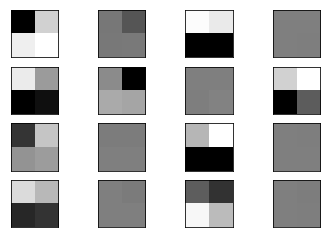

In [11]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(2, 2), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

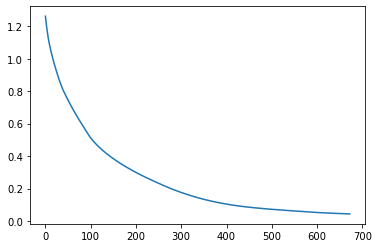

In [12]:
plt.plot(mlp.loss_curve_)
plt.show()

In [13]:
mlp.classes_

array([0, 1, 2])

In [14]:
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['predict'])

In [15]:
dftest = pd.concat([y_test, y_predict])
df3 = dftest.head(25)
df3.head()

,type,predict
114,2.0,NaN
62,1.0,NaN
33,0.0,NaN
107,2.0,NaN
7,0.0,NaN


In [16]:
#Build a "dummy" classifier that predicts every observation to be the most frequent class, in this case 'no-exit')
dummy = DummyClassifier(strategy=  "prior")#, Constant = 1)
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [17]:
dumb_pred = pd.DataFrame(dumb_pred,index = y_test.index, columns = ['predict'])

In [18]:
print("Test accuracy (ANN) =", mlp.score(X_test,y_test), end="\n\n")

print("Test accuracy (Dummy Classifier) =", dumb.score(dumb_pred,y_test))

Test accuracy (ANN) = 0.9736842105263158

Test accuracy (Dummy Classifier) = 0.23684210526315788


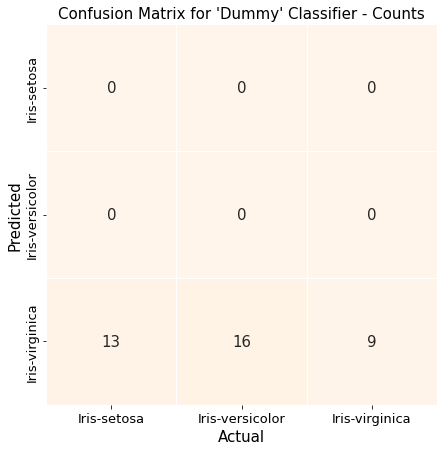

In [19]:
#generate confusion matrix for Dummy classifier
cm_dummy = confusion_matrix(y_test, dumb_pred)
#put it into a dataframe for seaborn plot function
cm_dummy_df = pd.DataFrame(cm_dummy)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for 'Dummy' Classifier - Counts", fontsize=15)

plt.show()

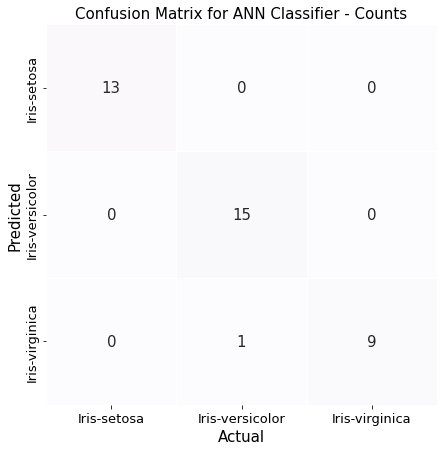

In [20]:
#generate confusion matrix
cm_ann = confusion_matrix(y_test, y_predict)
#put it into a dataframe
cm_ann_df = pd.DataFrame(cm_ann)

#plot CM
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(cm_ann_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'], yticklabels=["Iris-setosa","Iris-versicolor", 'Iris-virginica'])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
ax.set_yticklabels(["Iris-setosa","Iris-versicolor", 'Iris-virginica'], fontsize=13)
plt.title("Confusion Matrix for ANN Classifier - Counts", fontsize=15)
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



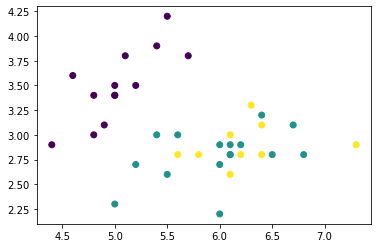

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sepal_length'], X_test['sepal_width'],c=y_test['type'])

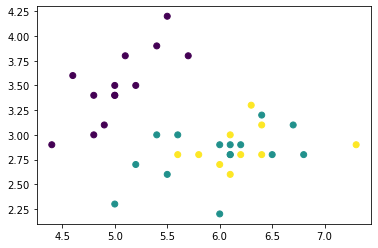

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_test['sepal_length'], X_test['sepal_width'],c= y_predict['predict'])

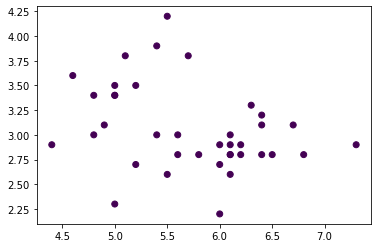

In [24]:
plt.scatter(X_test['sepal_length'], X_test['sepal_width'],c= dumb_pred['predict'])

Automatically created module for IPython interactive environment


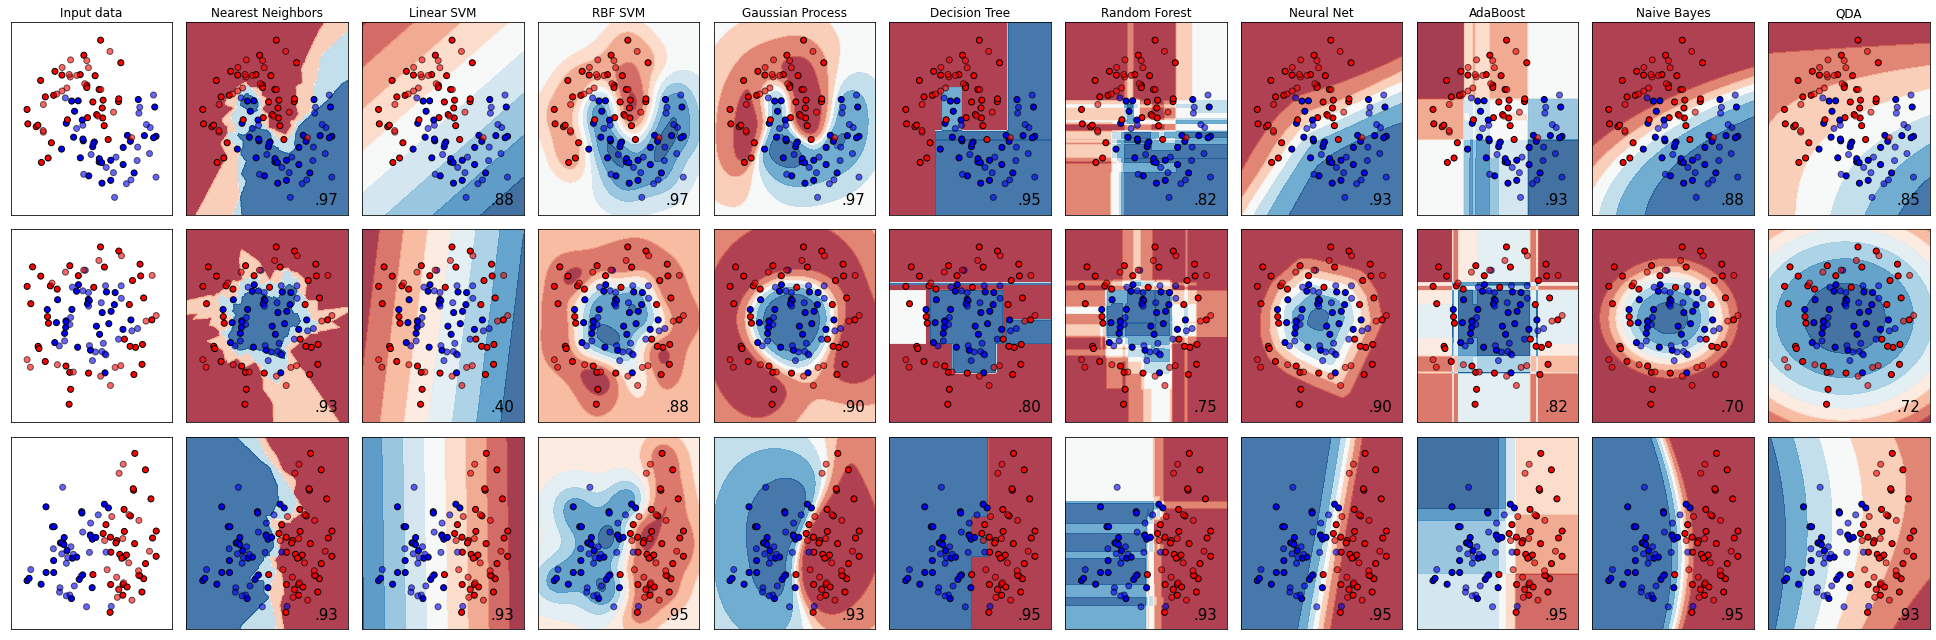

In [25]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Interpretation

The purpose of this project is uiliting Neural Networks to predict the type of the flower. 

Neural Network and MLP classifier have been applied in this case. After 1000 tims of iterations, the data fit the model. The accuracy for MLP is 0.97, it might not as good as nueral networks.

The baseline for this prediction algorithm is dummy classifier. 

The confusion matrix is here to help us identify different types of errors. The result is as expected, virginica has lower score vs. predictors for setosa and virsicle.